In [7]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
data = np.load('/fastio2/dasha/double_pulse/data.npy', mmap_mode='r')

In [37]:
data = data.reshape(data.shape[0])

In [38]:
pos = data['meson']['position']

In [39]:
pos.shape

(1476948, 3)

In [41]:
data_cont = data[np.all(pos < 500, axis =1) & np.all(pos > -500, axis =1)]

In [43]:
data_cont.shape

(1030490,)

In [44]:
data_cont['meson'][:10]

array([(        15, 623558.4   , [-173.23062  ,  486.46643  ,  410.74902  ], [0.7196309 , 3.221025  ],  9590.049,  1.6786724 ),
       (        15,  31720.547 , [-196.42699  , -423.03912  , -226.94145  ], [0.27639025, 2.565376  ],  9749.265,  0.645834  ),
       (4294967281,  29602.137 , [ 336.4368   , -187.77905  ,  297.09894  ], [0.60694706, 5.8746014 ], 20708.602,  0.01649226),
       (4294967281, 387455.84  , [-440.9561   , -385.1875   , -183.52654  ], [0.743403  , 6.233176  ],  9544.243, 13.542296  ),
       (        15,   4539.9307, [-317.13992  ,  228.9067   ,  181.84428  ], [2.2512085 , 1.5315467 ], 14257.316,  0.63758755),
       (4294967281,  15067.008 , [ 177.7996   , -216.46272  , -332.74414  ], [1.235385  , 3.802682  ],  9894.103,  0.88971543),
       (4294967281,  12754.623 , [ 345.39532  ,  177.35832  , -224.7707   ], [2.2877822 , 5.5212502 ],  9617.191,  2.9877505 ),
       (        15,   3894.9194, [-282.95703  ,    1.8634845,  130.43333  ], [2.6067154 , 3.5096169 ],  

In [47]:
w = np.ones(data.shape[0])/data.shape[0]
wc = np.ones(data_cont.shape[0])/data_cont.shape[0]

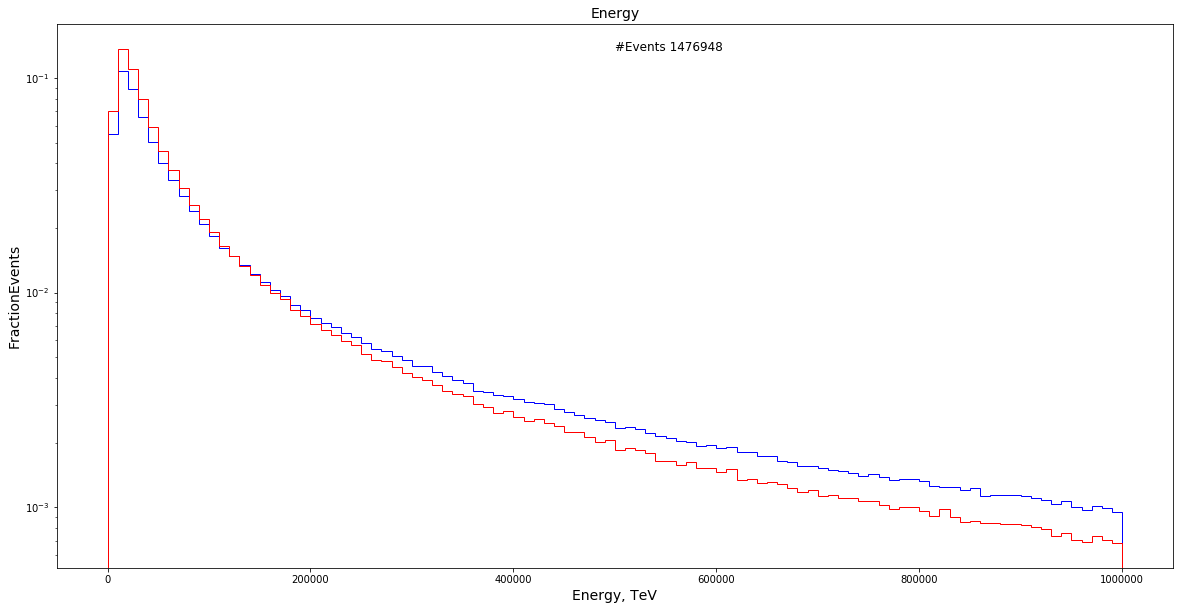

In [48]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, TeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['neutrino']['energy'], bins =100,  weights = w, histtype = 'step',edgecolor ='b', lw =1, fc=(0, 0, 1, 0.2), range = [0,1000000], label = "Nu")  
ax.hist(data_cont['neutrino']['energy'], bins =100, weights = wc, histtype = 'step',edgecolor ='r', lw =1, fc=(1, 0, 0, 0.2), range = [0,1000000], label = "Nu")  

plt.show()

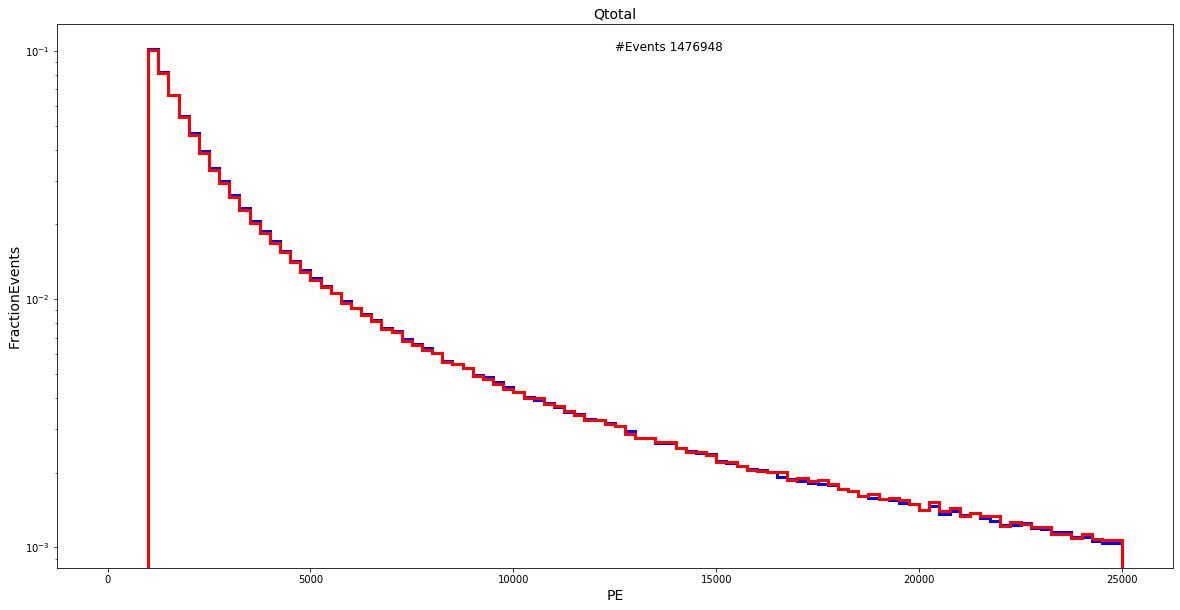

In [50]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Qtotal", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('PE', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['q_tot'], bins =100,  histtype = 'step',weights =w, edgecolor ='b', lw =3, range = [0,2.5*10**4], label = "Qtot")  
ax.hist(data_cont['q_tot'], bins =100,  histtype = 'step', weights =wc, edgecolor ='r', lw =3, range = [0,2.5*10**4], label = "Qtot")  

plt.show()

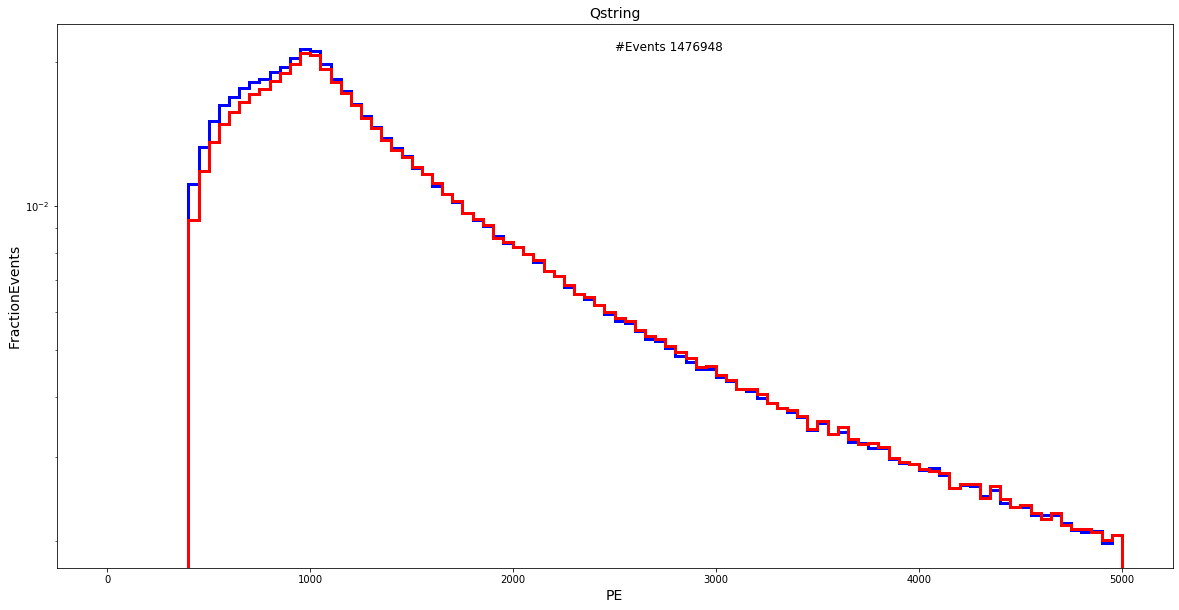

In [53]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Qstring", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('PE', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)    
ax.hist(data['q_st'], bins =100, histtype = 'step',edgecolor ='b', weights =w,  lw =3, range = [0,0.5*10**4], label = "Qtot")  
ax.hist(data_cont['q_st'], bins =100,  histtype = 'step', weights =wc, edgecolor ='r', lw =3, range = [0,0.5*10**4], label = "Qtot")  

plt.show()

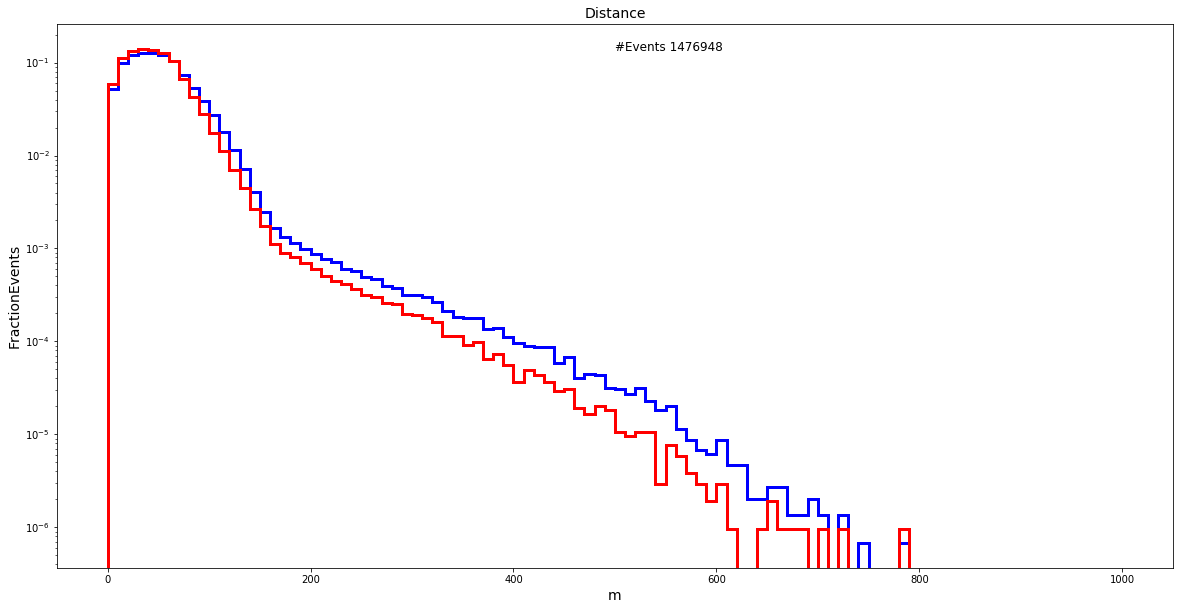

In [52]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['distance'], bins =100, histtype = 'step', weights =w, edgecolor ='b', lw =3, range = [0,10**3], label = "Qtot")  
ax.hist(data_cont['distance'], bins =100, histtype = 'step', weights =wc, edgecolor ='r', lw =3, range = [0,10**3], label = "Qtot")  

plt.show()

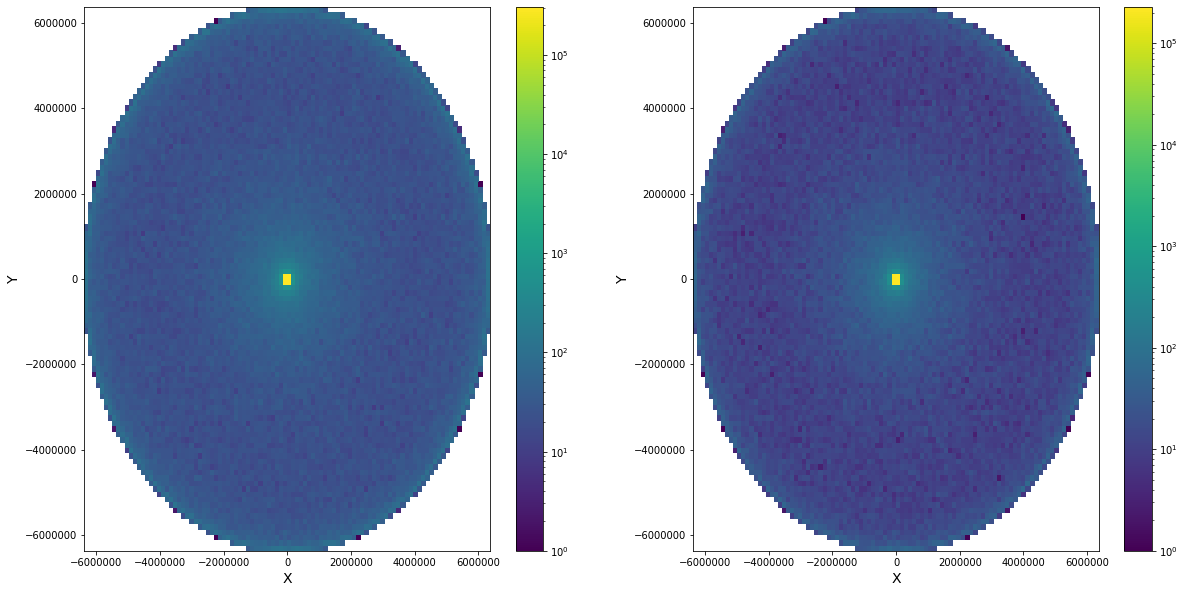

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10))
plt.title('Neutrino vertex XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.subplot(1,2,1)
plt.hist2d(data['neutrino']['position'][:,0],data['neutrino']['position'][:,1],bins = 100 ,norm=mpl.colors.LogNorm())
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(1,2,2)
plt.hist2d(data_cont['neutrino']['position'][:,0],data_cont['neutrino']['position'][:,1], bins =100,norm=mpl.colors.LogNorm() )
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()

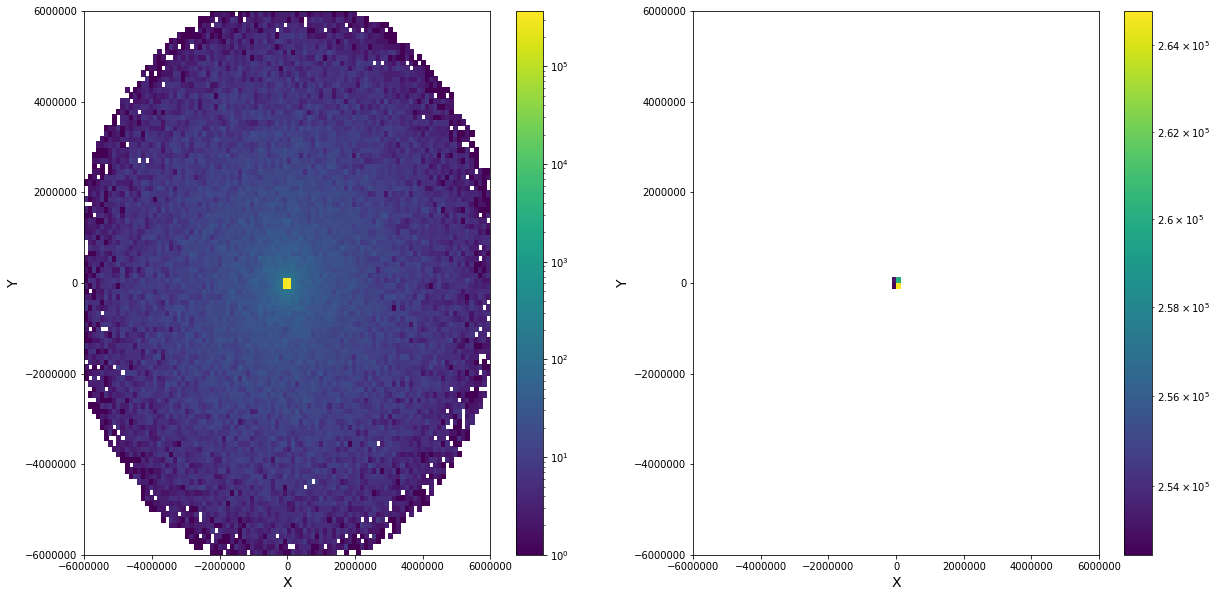

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10))
plt.title('Tau vertex XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(1,2,1)
plt.hist2d(data['meson']['position'][:,0],data['meson']['position'][:,1],bins = 100 ,norm=mpl.colors.LogNorm(), range=[[-6000000,6000000],[-6000000,6000000]])
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(1,2,2)
plt.hist2d(data_cont['meson']['position'][:,0],data_cont['meson']['position'][:,1], bins =100,norm=mpl.colors.LogNorm(), range=[[-6000000,6000000],[-6000000,6000000]])
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()
plt.show()

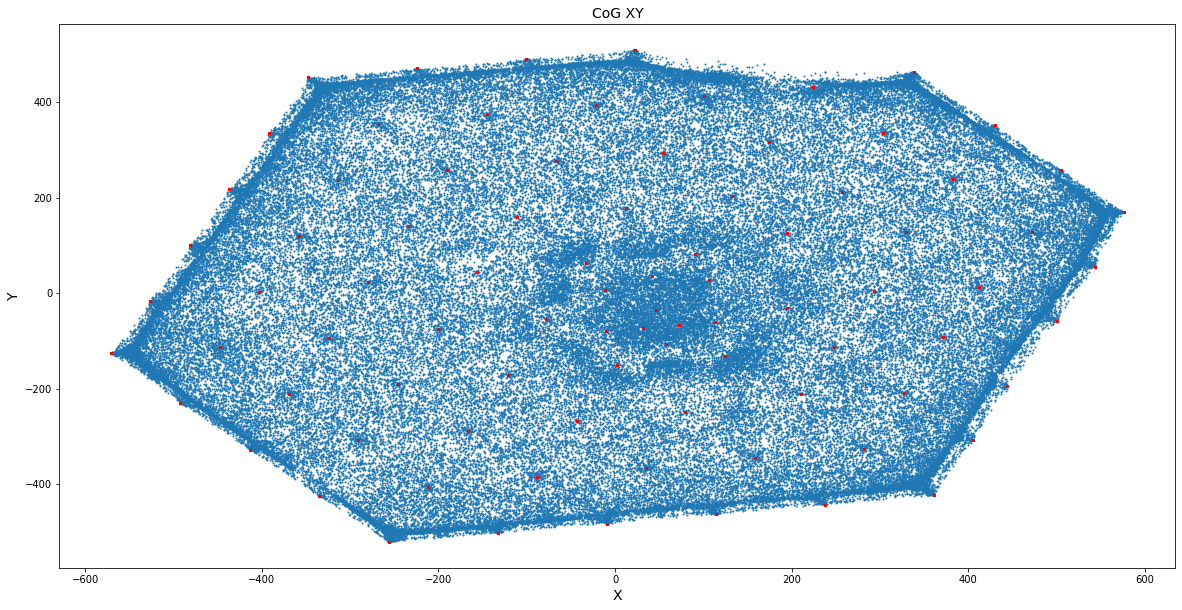

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('CoG XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.scatter(data['cog'][:,0],data['cog'][:,1], s = 1, )
plt.scatter(data['st_pos'][:,0],data['st_pos'][:,1], s = 2, c='red' )
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.show()
